<a href="https://colab.research.google.com/github/comaraDOTcom/supple-pose/blob/main/MMPose_DTL_GOLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -U numpy
!pip install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"
!git clone https://github.com/open-mmlab/mmpose.git
%cd mmpose
!pip install -e .
import mmpose
print(mmpose.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
fatal: destination path 'mmpose' already exists and is not an empty directory.
/content/mmpose/mmpose
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmpose/mmpose
ERROR: file:///content/mmpose/mmpose does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
1.0.0


In [2]:
!mim download mmpose --config td-hm_hrnet-w48_8xb32-210e_coco-256x192  --dest .

processing td-hm_hrnet-w48_8xb32-210e_coco-256x192...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.7/256.7 MiB 7.1 MB/s eta 0:00:00
Successfully downloaded td-hm_hrnet-w48_8xb32-210e_coco-256x192-0e67c616_20220913.pth to /content
Successfully dumped td-hm_hrnet-w48_8xb32-210e_coco-256x192.py to /content


In [9]:
pip install numpy --upgrade --ignore-installed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [3]:
%cd mmpose

/content/mmpose


In [4]:
from mmpose.apis import inference_topdown, init_model
from mmpose.utils import register_all_modules

register_all_modules()

config_file = 'td-hm_hrnet-w48_8xb32-210e_coco-256x192.py'
checkpoint_file = 'td-hm_hrnet-w48_8xb32-210e_coco-256x192-0e67c616_20220913.pth'
model = init_model(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'

Loads checkpoint by local backend from path: td-hm_hrnet-w48_8xb32-210e_coco-256x192-0e67c616_20220913.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



In [5]:
# preparing an image with a golfer
results = inference_topdown(model, '../jonrahm-dtl-p4.png')

In [6]:
results[0].pred_instances.keypoints.squeeze()

array([[563.234375  , 300.84895611],
       [563.234375  , 284.23437214],
       [563.234375  , 284.23437214],
       [563.234375  , 267.61978817],
       [546.61979167, 284.23437214],
       [513.390625  , 300.84895611],
       [513.390625  , 300.84895611],
       [530.00520833, 383.92187595],
       [530.00520833, 400.53645992],
       [530.00520833, 400.53645992],
       [530.00520833, 400.53645992],
       [446.93229167, 417.15104389],
       [463.546875  , 417.15104389],
       [463.546875  , 500.22396374],
       [480.16145833, 466.9947958 ],
       [463.546875  , 649.75521946],
       [480.16145833, 649.75521946]])

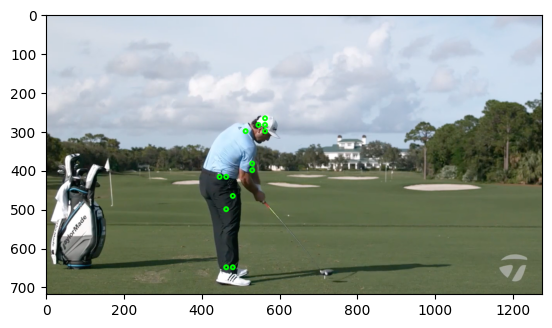

In [7]:
import cv2
import matplotlib.pyplot as plt 

frame = cv2.imread('../jonrahm-dtl-p4.png')
for keypoint in results[0].pred_instances.keypoints.squeeze():
  frame = cv2.circle(frame, (int(keypoint[0]), int(keypoint[1])), 
                     radius=5, color=(0, 255, 0), thickness=3)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

## Rory Mcilroy
At p0->p2->p4 DTL and then p0->p2->p4 Face-On.

In [31]:
def inference_result(img):
    results = inference_topdown(model, img)
    frame = cv2.imread(img)
    for keypoint in results[0].pred_instances.keypoints.squeeze():
      frame = cv2.circle(frame, (int(keypoint[0]), int(keypoint[1])), 
                     radius=5, color=(0, 255, 0), thickness=3)

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    return results

In [32]:
# dtl data
rory_dtl_p0 = '../rorymcilroy-dtl-p0.png'
rory_dtl_p2 = '../rorymcilroy-dtl-p2.png'
rory_dtl_p4 = '../rorymcilroy-dtl-p4.png'

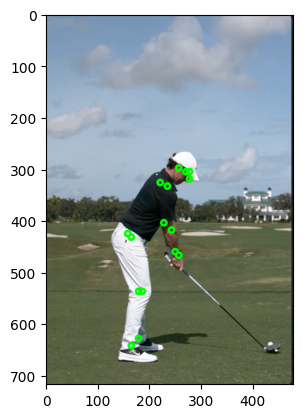

In [33]:
rory_p0_pose = inference_result(rory_dtl_p0)

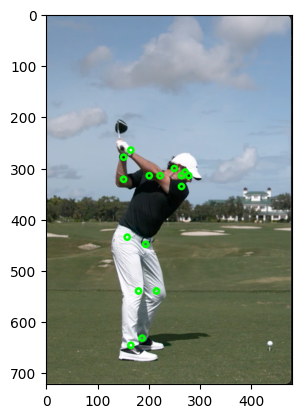

In [34]:
rory_p2_pose = inference_result(rory_dtl_p2)

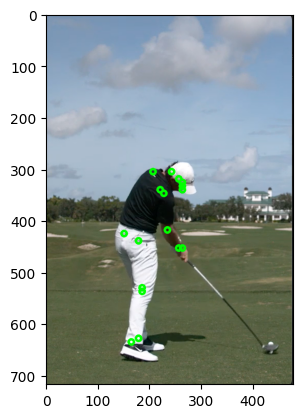

In [35]:
rory_p4_pose = inference_result(rory_dtl_p4)

In [ ]:
# look at coordinate drift berween frames.

### Conor O'Mara Example (Driver)

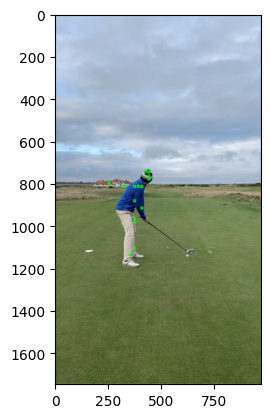

In [46]:
# example where pre-cropping leads to keypoint landmarks being set as a clubhouse.
conoromara_amateur_dtl_p0_uncropped = '../conoromara-dtl-p0-uncropped.png'
conoromara_p0_pose_uncropped = inference_result(conoromara_amateur_dtl_p0_uncropped)

In [40]:
# dtl data
conoromara_amateur_dtl_p0 = '../conoromara-dtl-p0.png'
conoromara_amateur_dtl_p2 = '../conoromara-dtl-p2.png'
conoromara_amateur_dtl_p4 = '../conoromara-dtl-p4.png'

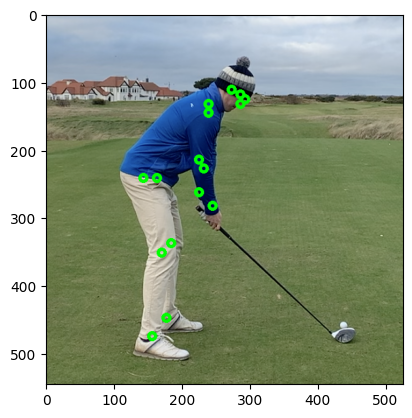

In [44]:
conoromara_p0_pose = inference_result(conoromara_amateur_dtl_p0)

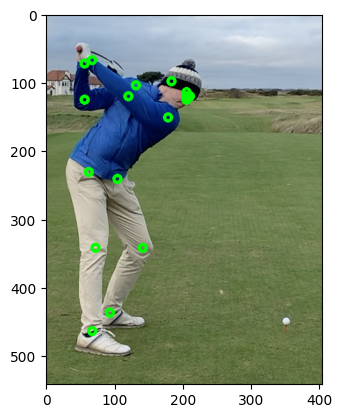

In [45]:
conoromara_p2_pose = inference_result(conoromara_amateur_dtl_p2)

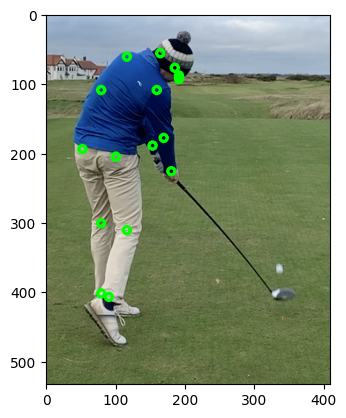

In [43]:
conoromara_p2_pose = inference_result(conoromara_amateur_dtl_p4)